In [1]:
#import all the library file
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#getting the data from train and test
import pandas as pd
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')
df1

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [3]:
#shape of the dataframe
df1.shape

(153164, 2)

In [4]:
#data types
df1.dtypes

id              object
comment_text    object
dtype: object

In [70]:
#shape of the dataframe
df.shape

(143346, 7)

In [71]:
#data types
df.dtypes

comment_text        int32
malignant           int64
highly_malignant    int64
rude                int64
threat              int64
abuse               int64
loathe              int64
dtype: object

In [5]:
#checking the null value or not
df1.isnull().sum()

id              0
comment_text    0
dtype: int64

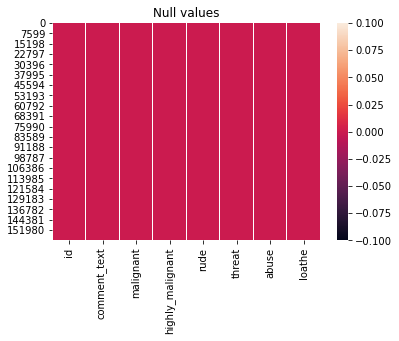

In [6]:
#checking for the null value
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

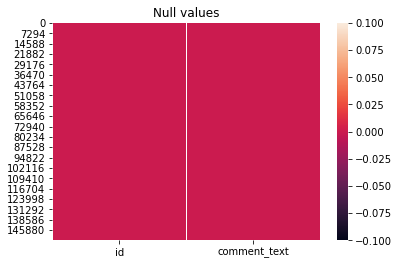

In [7]:
#checking for the null value
sns.heatmap(df1.isnull())
plt.title("Null values")
plt.show()

In [8]:
#we get  mean value and standard deviation value
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
##we get  mean value and standard deviation value
df1.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,97682d23ac7593ae,"That's helpful. MOS be damned, Thecodingprojec..."
freq,1,1


# Univariant analysis

<AxesSubplot:>

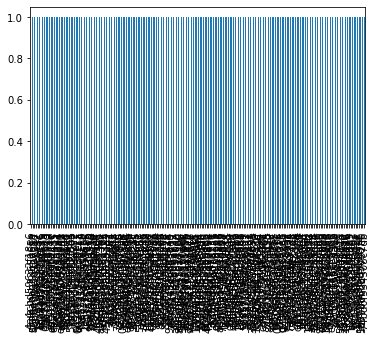

In [10]:
#df['malignant'].value_counts().head(10).plot.bar()
#univariant analysis for catergerical value
df['id'].value_counts().head(200).plot.bar()

<AxesSubplot:>

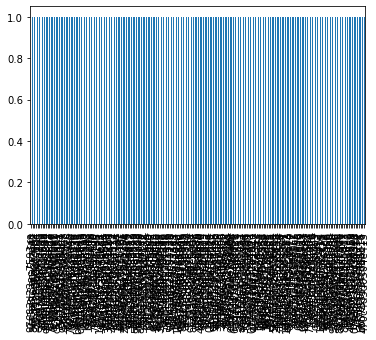

In [11]:
#univariant analysis for catergerical value
df1['id'].value_counts().head(200).plot.bar()

<AxesSubplot:>

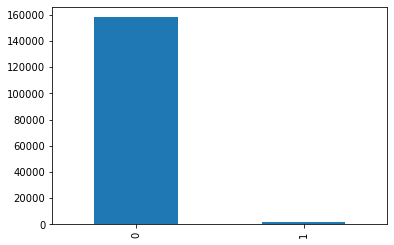

In [12]:
#in  highly_malignant o which high value and 1 has low value
df['highly_malignant'].value_counts().head(10).plot.bar()

<AxesSubplot:>

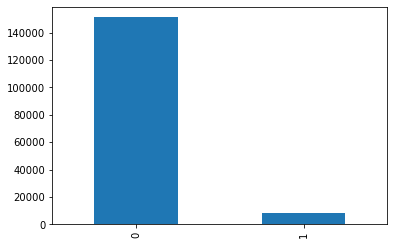

In [13]:
#in  rude o which high value and 1 has low value
df['rude'].value_counts().head(10).plot.bar()

<AxesSubplot:>

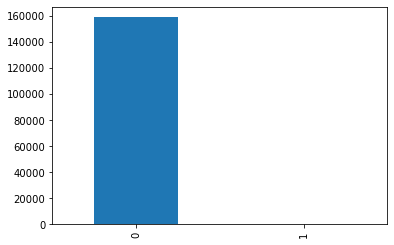

In [14]:
#in  threat o which high value and 1 has low value
df['threat'].value_counts().head(10).plot.bar()

<AxesSubplot:>

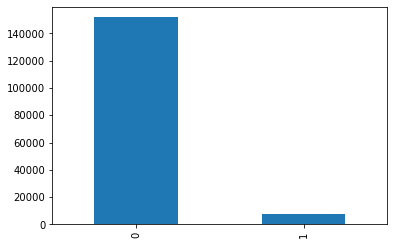

In [15]:
#in  abuse o which high value and 1 has low value
df['abuse'].value_counts().head(10).plot.bar()

<AxesSubplot:>

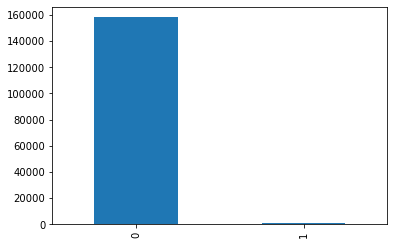

In [16]:
#in  loathe o which high value and 1 has low value
df['loathe'].value_counts().head(10).plot.bar()

<AxesSubplot:>

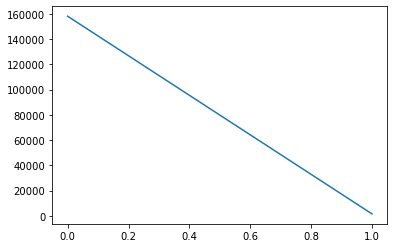

In [17]:
df['highly_malignant'].value_counts().sort_index().plot.line()

<AxesSubplot:>

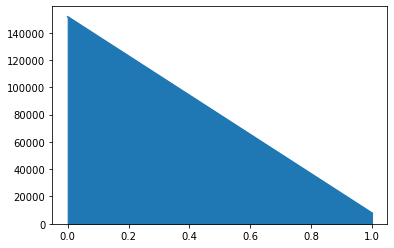

In [18]:
df['abuse'].value_counts().sort_index().plot.area()

<AxesSubplot:ylabel='Frequency'>

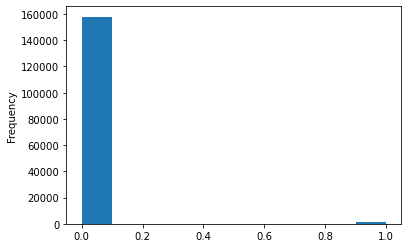

In [19]:
df['highly_malignant'].plot.hist()

In [20]:
#getting value of numerical data and categorical
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [21]:
#getting value of numerical data and categorical
numeric_data1 = df1.select_dtypes(include=[np.number])
categorical_data1 = df1.select_dtypes(exclude=[np.number])

In [22]:
#numerical data
numeric_data.columns

Index(['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], dtype='object')

In [23]:
#categorical data
categorical_data.columns

Index(['id', 'comment_text'], dtype='object')

In [24]:
#numerical data
numeric_data1.columns

Index([], dtype='object')

In [25]:
#categorical data
categorical_data1.columns

Index(['id', 'comment_text'], dtype='object')

In [26]:
#counting the value data from  train.csv
df.stack().value_counts()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   922328
1                                                                                                                                                                                            

In [27]:
#counting the value data from  train.csv
df1.stack().value_counts()

That's helpful. MOS be damned, Thecodingproject thinks it's '10x' worse. —                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [28]:
df1.corr()

""


In [29]:
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


# multivariant analaysis

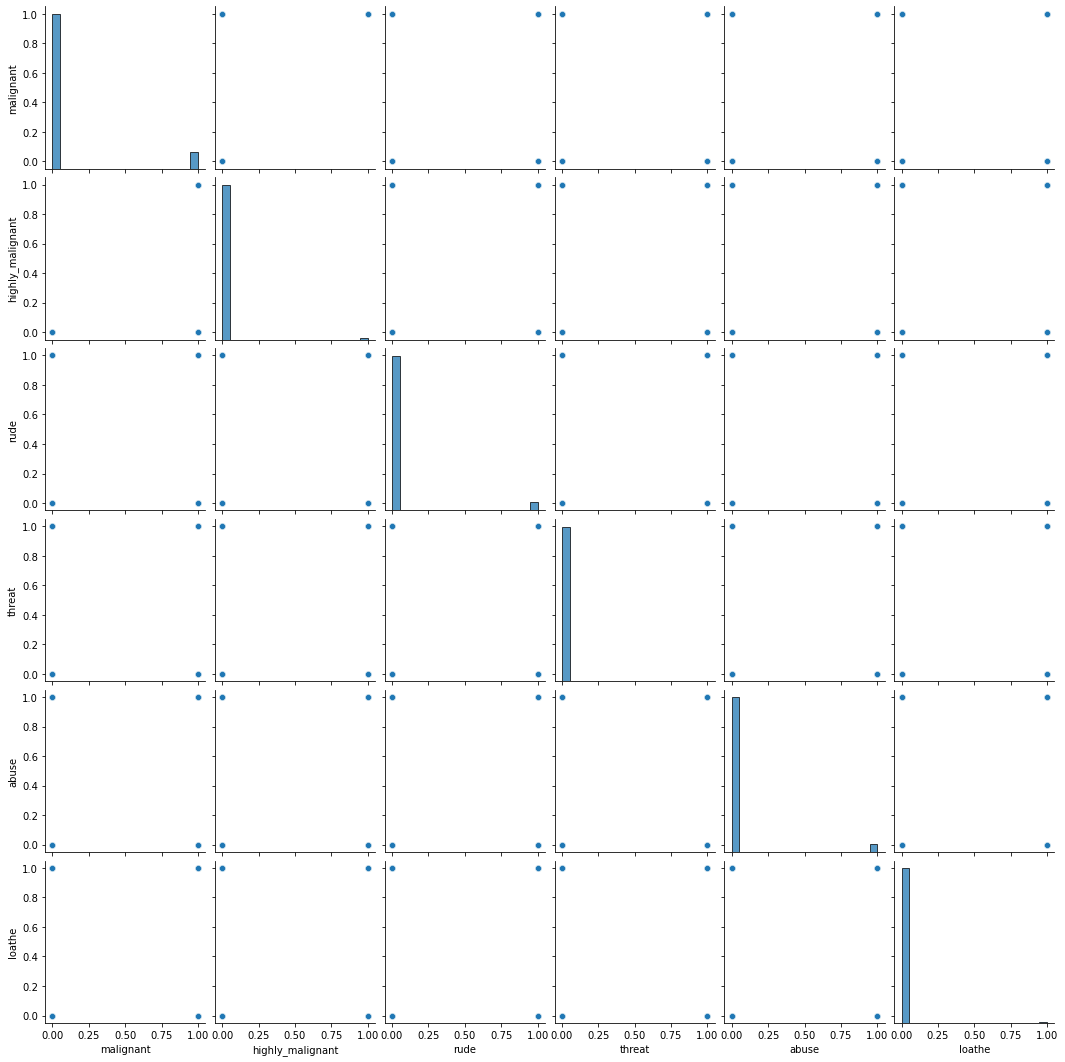

In [30]:
sns.pairplot(df)

# Bivariant analaysis

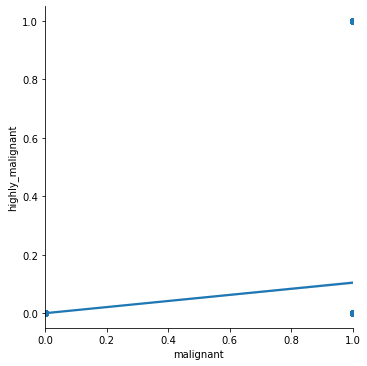

In [31]:
sns.lmplot(x='malignant',y='highly_malignant',fit_reg=True,data=df)

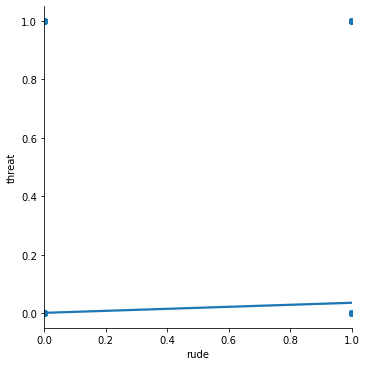

In [32]:
sns.lmplot(x='rude',y='threat',fit_reg=True,data=df)

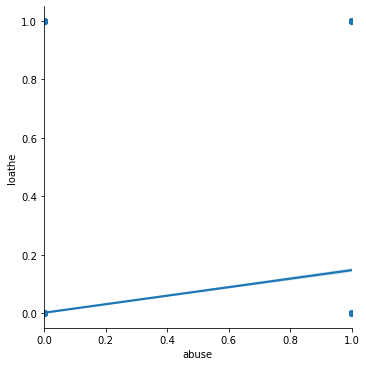

In [33]:
sns.lmplot(x='abuse',y='loathe',fit_reg=True,data=df)

In [34]:
#coverting catagerical value to numerical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['id', 'comment_text']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [35]:
#coverting catagerical value to numerical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['id', 'comment_text']
for val in list1:
    df1[val]=le.fit_transform(df1[val].astype(str))

In [36]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,72698,0,0,0,0,0,0
1,1,68359,0,0,0,0,0,0
2,2,79594,0,0,0,0,0,0
3,4,35519,0,0,0,0,0,0
4,5,146426,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,159505,44289,0,0,0,0,0,0
159567,159510,145720,0,0,0,0,0,0
159568,159524,122203,0,0,0,0,0,0
159569,159535,60037,0,0,0,0,0,0


In [37]:
df1

,id,comment_text
0,0,139489
1,1,82945
2,2,15380
3,3,71743
4,4,116535
...,...,...
153159,153159,51845
153160,153160,93347
153161,153161,13499
153162,153162,8042


In [38]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
159566    False
159567    False
159568    False
159569    False
159570    False
Length: 159571, dtype: bool

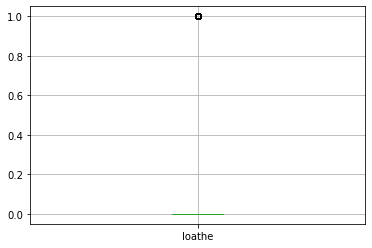

In [39]:
df.boxplot(column='loathe')
plt.show()

<AxesSubplot:ylabel='Density'>

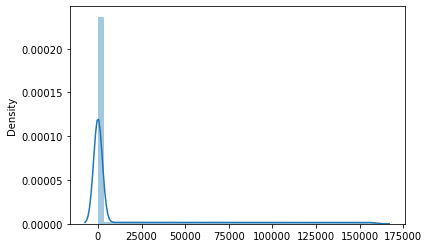

In [40]:
sns.distplot(df)

<AxesSubplot:ylabel='Density'>

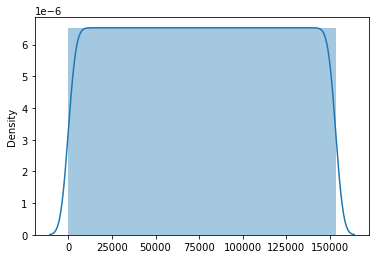

In [41]:
sns.distplot(df1)

In [42]:
hai= df
print("input array",hai)

input array             id  comment_text  malignant  highly_malignant  rude  threat  \
0            0         72698          0                 0     0       0   
1            1         68359          0                 0     0       0   
2            2         79594          0                 0     0       0   
3            4         35519          0                 0     0       0   
4            5        146426          0                 0     0       0   
...        ...           ...        ...               ...   ...     ...   
159566  159505         44289          0                 0     0       0   
159567  159510        145720          0                 0     0       0   
159568  159524        122203          0                 0     0       0   
159569  159535         60037          0                 0     0       0   
159570  159541         31106          0                 0     0       0   

        abuse  loathe  
0           0       0  
1           0       0  
2           0  

In [43]:
#unnamed column droped
df=df.drop(['id'], axis = 1)

In [44]:
#unnamed column droped
df1=df1.drop(['id'], axis = 1)

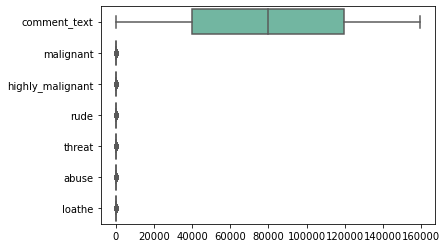

In [45]:
#outlier detector
ax = sns.boxplot(data=df, orient="h", palette="Set2")

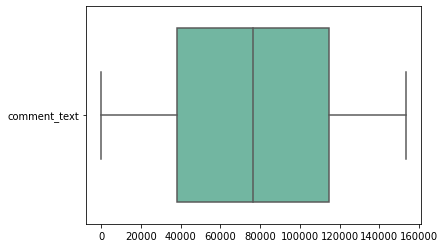

In [46]:
#outlier detector
ax = sns.boxplot(data=df1, orient="h", palette="Set2")

In [47]:
#for i in  df.describe().columns:
#    sns.boxplot(df[i])
#    plt.show()


In [48]:
df.skew()

comment_text        1.282301e-19
malignant           2.745854e+00
highly_malignant    9.851722e+00
rude                3.992817e+00
threat              1.818900e+01
abuse               4.160540e+00
loathe              1.051592e+01
dtype: float64

In [49]:
#removing outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print(df.shape)

(159571, 7)
(143346, 7)


In [50]:
df.shape

(143346, 7)

In [51]:
#StandardScaler uses to reduce the rows
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(df)

        comment_text  malignant  highly_malignant  rude  threat  abuse  loathe
0              72698          0                 0     0       0      0       0
1              68359          0                 0     0       0      0       0
2              79594          0                 0     0       0      0       0
3              35519          0                 0     0       0      0       0
4             146426          0                 0     0       0      0       0
...              ...        ...               ...   ...     ...    ...     ...
159566         44289          0                 0     0       0      0       0
159567        145720          0                 0     0       0      0       0
159568        122203          0                 0     0       0      0       0
159569         60037          0                 0     0       0      0       0
159570         31106          0                 0     0       0      0       0

[143346 rows x 7 columns]


In [52]:
X=df.drop('loathe',axis=1)
y=df['loathe']

In [53]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.75,random_state=i)
    mod=LinearRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 30


In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.22,random_state=30)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[31537]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31537

    accuracy                           1.00     31537
   macro avg       1.00      1.00      1.00     31537
weighted avg       1.00      1.00      1.00     31537



In [57]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[31537]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31537

    accuracy                           1.00     31537
   macro avg       1.00      1.00      1.00     31537
weighted avg       1.00      1.00      1.00     31537



In [58]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

1.0
[[31537]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31537

    accuracy                           1.00     31537
   macro avg       1.00      1.00      1.00     31537
weighted avg       1.00      1.00      1.00     31537



In [59]:
g=GaussianNB()
g.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[31537]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31537

    accuracy                           1.00     31537
   macro avg       1.00      1.00      1.00     31537
weighted avg       1.00      1.00      1.00     31537



In [60]:
from sklearn.model_selection import cross_val_score


In [61]:
score=cross_val_score(rf,X,y,cv=5)
print(score)
print(score.mean())

[1. 1. 1. 1. 1.]
1.0


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameters ={'max_depth':np.arange(2,15),
           'criterion':['gini','entropy']}

In [64]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [66]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [67]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [68]:
accuracy_score(y_test,GCV_pred)

1.0

In [69]:
import joblib
joblib.dump(GCV.best_estimator_,"predict.pkl")

['predict.pkl']